<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Ensemble Learning: Bagging and Random Forests
              
</p>
</div>

Data Science Cohort Live NYC Feb 2022
<p>Phase 3: Topic 31</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

In [849]:
import numpy as np
import pandas as pd
import xlrd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,\
ExtraTreesClassifier, VotingClassifier, StackingRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#### Motivation:

Kim-Jong-un after using decision tree: launch nukes?

<center><img src = "Images/kimjongun.jpg" width = 700 /></center>

Maybe better to make this a more democratic process with more perspectives on the data:

Other decision makers:

<table><tr><td><img src="Images/mother_teresa.webp" width="250"/><br><center>Mother Theresa</center></td><td><img src="Images/sakharov.jpg" width="200"/><br><center>Andrei Sakharov</center></td><td><img src="Images/cat_press_button.gif" width="300"/><br><center>Nice kitty.</center></td></tr></table>

This thinking applicable to all models:
- particularly useful in the context of Decision Trees

#### Deficiencies of Decision Trees:
- that ensemble learning can address.

Reminder of decision trees: 
- recursively make splits based on entropy or impurity
- split on feature best increasing information gain
- Keep splitting until leaf pure OR max depth

<img src = "Images/dec_tree_partitioning.jpg" width = 800/>

- Tendency to overfit at large max depth.
- High enough depth: will fit to training set perfectly.

<img src = "Images/dectree_perfectfit.png" />
<center> A perfect fit to the training set. </center>

<img src = "Images/decisiontree_classification_overfitting.png"  />
<center> Some more decision tree overfitting </center>

Too much **variance**.

To avoid: reduce decision tree depth to limit variance.
    
But with decision tree, will easily end up underfitting.

- Can increase depth again to get better:
    - But very likely to learn a boundary that overfits

<img src = "Images/dectree_underfitting.png" width = 400/>

Bias-variance problem is severe with Decision Tree models:
- Very sensitive to tree depth.

A very nice visualization of this sensitivity on the regression task:
<img src = "Images/decision_tree_regression.png" />

**Decision trees not-robust**:

- Criterion is harsh: choose *single* feature that wins and split on that.
- But many features may be important in a region and should be factored in.

<img src = "Images/tree_features.png" />
Both Culmen length and depth matter here. But split for each region considers only one or the other.

- Doesn't reflect the way features are related to each other and collectively impact the target.


**Can we figure out a way in a split for a given subregion to factor in different features?**


Depending on goal could be nice if modeling target-feature function:
- without feature engineering.
- without distributional assumptions

#### Another issue:

- Recursion: after split on "best" feature, different subsets never talk to each other again.
- But maybe other branches/regions: info influencing split/class assignment in given subregion.

<img src = "Images/dec_tree_partitioning.jpg" width =500/>
<center>Choosing next split: black or orange?</center>

**Perhaps sampling/factoring in different regions?**

Increasing depth and number of splits:
- Very quickly: small number of points in given sub-region
- Feature decision very sensitive to points in specific region.

<img src = "Images/data_points.png" width = 200 />
<center> Plausible small subregion with few points </center>

Two possible choices (equivalent in terms of impurity):

<img src = "Images/data_points_splt1.png" width = 200 />

<img src = "Images/data_points_splt2.png" width = 200 />

Decision boundary instability: 
- small changes/fluctuations in data lead to very different decision surface locally.

<img src = "Images/data_points_splt1_inst.png" width =400/>

<img src = "Images/data_points_splt2_inst.png" width =400/>

How to get around this?

Don't want to rely too heavily on specific data points and their location:
- Maybe introducing randomness in data point sampling in some way.

#### Why am I using decision trees at all then?

#### But decision trees are blindingly fast.
- Recursion on binary trees
- Greedy criterion:
    - always split on best feature at local node

**Want to keep this speed and still use trees**

But also want to:
- Sample other features when making splits
- Sample other regions in feature-space when making decisions on class assignments


- Learn from classifiers training on different realizations of the dataset:
    - a set of given points has different weight/importance in each realization

Way to create realization of dataset with different weights for data: 
- **Bagging (boostrap aggregation)**

<center><img src = "Images/sample_bagging_only.png" width = 600/></center>

<center><img src = "Images/sample_bagging_only.png"/></center>

The boostrap:

- N samples in training set.
- Randomly resample training set **with replacement** N times.
- Resampled set also has N samples.

A given point now has different weight/importance in each realization

More explicitly: see training point reweighting under bootstrapping

In [96]:
# (feature, label) pairs
train = np.array([(-1,1), (3.1, 0) , (-2.5, 1),
         (1, 0), (-4, 1), (.5, 0)])
train

array([[-1. ,  1. ],
       [ 3.1,  0. ],
       [-2.5,  1. ],
       [ 1. ,  0. ],
       [-4. ,  1. ],
       [ 0.5,  0. ]])

In [99]:
from numpy.random import choice
idx_resampled =choice(range(len(train)), 
                      size = len(train),
                       replace = True)
train[idx_resampled]

array([[-4. ,  1. ],
       [-4. ,  1. ],
       [ 0.5,  0. ],
       [ 0.5,  0. ],
       [-2.5,  1. ],
       [ 1. ,  0. ]])

#### Now use ensemble of trained models
- Aggregate to make prediction on test data

<center><img src = "Images/bagging_classifier.png" /></center>

In the context of regression:
- aggregation function is average of regressor trees

<center><img src = "Images/bagging_regressor.png" /></center>

The concept of bagging of estimators is **NOT** limited to trees:
- can use any classifier or regressor and perform bagging procedures.
- but mainly useful for local models like DecisionTree or KNN


To implement bagging classifier in sklearn:

In [785]:
# if doing classification
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# if doing regression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

We'll do classification:
- Predict diabetes via health stats
- Pima Indian diabetes dataset

In [533]:
diab_df = pd.read_csv('Data/diabetes.csv')
diab_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [535]:
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [529]:
diab_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- Separate features and target
- Train/test split

In [645]:
# train test split
X = diab_df.drop(columns = ['Outcome'])
y = diab_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.15)

Now develop our pipeline.

In [787]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

Define the bagging classifier and put it into a pipeline. 

Then integrate into a grid search tuning on tree depth.

In [804]:
bag_class_decision = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 150)
bag_pipe = Pipeline([('scaler', StandardScaler()),
                      ('model',
                       bag_class_decision)])
params = {'model__base_estimator__max_depth': np.arange(4,28,4)}
cv = GridSearchCV(estimator = bag_pipe, param_grid = params, cv = 5)

In [805]:
cv.fit(X_train, y_train);

Get best model and its balanced accuracy

In [806]:
best_model = cv.best_estimator_
cv.best_params_

{'model__base_estimator__max_depth': 16}

In [807]:
cv.best_score_

0.7607516147974163

In [808]:
pd.DataFrame(cv.cv_results_)[['param_model__base_estimator__max_depth', 'mean_test_score', 'std_test_score']]

,param_model__base_estimator__max_depth,mean_test_score,std_test_score
0,4,0.760716,0.034896
1,8,0.759201,0.022072
2,12,0.750006,0.032788
3,16,0.760752,0.031913
4,20,0.748444,0.033286
5,24,0.753106,0.033878


Fit the best model. Get predictions and report.

In [809]:
best_model.fit(X_train, y_train);

In [810]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        76
           1       0.64      0.62      0.63        40

    accuracy                           0.75       116
   macro avg       0.72      0.72      0.72       116
weighted avg       0.75      0.75      0.75       116



Is bagging better than baseline decision tree over the same range of tree depths?

In [795]:
simpletree_pipe = Pipeline([('scaler', StandardScaler()),
                      ('model',
                       DecisionTreeClassifier())]) 

params = {'model__max_depth': np.arange(4,28,4)}

cvtree = GridSearchCV(estimator = simpletree_pipe, param_grid = params, cv = 5)

cvtree.fit(X_train, y_train);

In [796]:
best_simplemodel = cvtree.best_estimator_
cvtree.best_params_

{'model__max_depth': 4}

In [797]:
cvtree.best_score_

0.7499941280093951

Classification report

In [798]:
best_simplemodel.fit(X_train, y_train)
y_pred_simple = best_simplemodel.predict(X_test)
print(classification_report(y_test, y_pred_simple))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78        76
           1       0.59      0.68      0.63        40

    accuracy                           0.72       116
   macro avg       0.70      0.71      0.70       116
weighted avg       0.74      0.72      0.73       116



A bit worse on the precision/recall for all classes -- especially positive class. 
- In many cases improvements on bagging alone will not be so significant.
- Sample bagging alone usually not enough to capture feature space.

Reason: 
- boostrapped samples are still highly correlated with each other

#### Final ingredient (first set of strategies)

- Effectively factor in other features when making splits
- Sample other regions in feature-space when making decisions on class assignments

Can effectively do this by considering only a random subset of features to split on at each node



Result: each tree may partition feature space in appreciably different ways.

<img src = "Images/rf_splitting.png"  width = 600/>

Overall effect of this:

<img src = "Images/indtree.gif"  width = 600/>

- Each decision tree can learn different important features to make splits on throughout feature space.
- Each tree can assign a given feature region to different classes based on its splits.

Individual trees making errors but **different** errors.


<img src = "Images/rfplot.gif"  width = 600/>

- Aggregating smooths large fluctuations of class assignments from individual trees out.
- Due to feature subset sampling: can learn more complex boundaries: smoothens these.
- Can also get probability of class assignment.

Import RandomForestClassifier

In [799]:
from sklearn.ensemble import RandomForestClassifier

Let's try out of the box.

In [800]:
rf_pipe = Pipeline([('scaler', StandardScaler()),
                      ('model',
                       RandomForestClassifier(n_estimators = 100))])

In [801]:
rf_pipe.fit(X_train, y_train);

In [802]:
y_rf_pred = rf_pipe.predict(X_test)

In [803]:
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82        76
           1       0.66      0.68      0.67        40

    accuracy                           0.77       116
   macro avg       0.74      0.75      0.74       116
weighted avg       0.77      0.77      0.77       116



#### Better than bagging and base Decision Tree.

#### Should tune model: understand relevant hyperparameters
- understand parameters of model

- n_estimators: number of trees in forest (very important):
    - optimal will depend on dataset size. But 50-250 is good starting tuning range.
- max_features: number of features to randomly sample at each node for evaluating split criterion.
    - good starting value (also default) is $\sqrt{M}$ where $M$ is number of features. (theoretical justification for this)

- max_depth: tree depth
    - due to randomizing and averaging: random forest not as sensitive to this as DecisionTree.
    - default is None. Trains tree to leaf purity. Typically don't touch this.

- min_sample_leaf: minimum number of samples required to be at a leaf node.
    - Default is 1 but having larger numbers can mean averaging effect from leaf
    - Higher values can have a regularizing effect.
    - Typically tune from 1-100 (depends on size of data)

For min sample leaf criterion: cuts out different portions of tree.

<img src = "Images/min_sample_leaf.png" />

Can also change objective functions:
- Gini
- entropy

Grid Search CV on our random forest:

In [829]:
rf_params = {'model__n_estimators': [50, 100, 200, 500] ,
             'model__min_samples_leaf': [1,3,5,7]}
rf_cv = GridSearchCV(estimator = rf_pipe, param_grid = rf_params, cv = 5)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__min_samples_leaf': [1, 3, 5, 7],
                         'model__n_estimators': [50, 100, 200, 500]})

In [830]:
rf_cv.best_score_

0.7699354081033472

In [831]:
rf_cv.best_params_

{'model__min_samples_leaf': 3, 'model__n_estimators': 500}

In [832]:
best_rf_model = rf_cv.best_estimator_
best_rf_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(min_samples_leaf=3, n_estimators=500))])

In [833]:
best_rf_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(min_samples_leaf=3, n_estimators=500))])

In [834]:
y_rfcv_pred = best_rf_model.predict(X_test)
print(classification_report(y_test,y_rfcv_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        76
           1       0.69      0.72      0.71        40

    accuracy                           0.79       116
   macro avg       0.77      0.78      0.77       116
weighted avg       0.80      0.79      0.79       116



OK this is pretty decent. There is also another nice thing about random forests:

Can see which features are most important in prediction:

- .feature_importances_ attribute

In [842]:
feat_imp = best_rf_model['model'].feature_importances_

feat_imp_series = pd.Series(feat_imp, 
          index = X.columns).sort_values(
    ascending = False)

In [844]:
feat_imp_series

Glucose                     0.299165
BMI                         0.178571
Age                         0.136588
DiabetesPedigreeFunction    0.108263
Pregnancies                 0.075907
BloodPressure               0.071042
Insulin                     0.066262
SkinThickness               0.064203
dtype: float64

<AxesSubplot:>

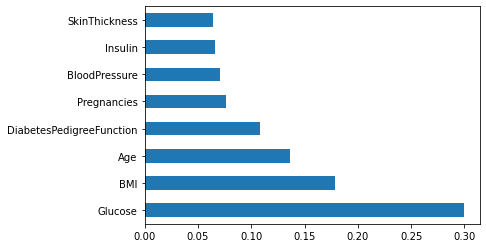

In [848]:
feat_imp_series.plot(kind = 'barh')

Evaluates feature importance:
- Determining for each tree how many times feature was used for splitting.
- Counts up occurences across entire forest and weights features.

#### Extremely Randomized Trees (Extra Trees)
- Sometimes our variance problems are extreme.
- Random forest taking way too long with too many estimators.

- Might want even one more randomization. 
- Instead of always choosing the *optimal* split at node:
    - randomly sample feature space inside node. 
    - split on best information gain from random sample.



Now **three** levels of randomization: 
- sampling of data
- sampling of features
- random selection of branching paths.

Compare typical effects:

<img src = "Images/extraatrees_forest_iris.png" width = 600/>

Extra randomness makes ExtraTrees a softer classifier.
- Very good for variance issues.

Let's import it and do our magic:

In [851]:
from sklearn.ensemble import ExtraTreesClassifier

In [770]:
# Instantiate an ExtraTreesClassifier

etc = ExtraTreesClassifier(max_features='sqrt',
                         max_samples=0.5,
                         bootstrap=True,
                         random_state=1)

In [771]:
# Fit it

etc.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=True, max_features='sqrt', max_samples=0.5,
                     random_state=1)

In [772]:
# Cross-validation

scores = cross_val_score(estimator=etc, X=X_train,
               y=y_train, cv=5)
scores

array([0.71755725, 0.80916031, 0.76923077, 0.71538462, 0.77692308])

In [773]:
np.median(scores)

0.7692307692307693

In [852]:
# Score on test

etc.score(X_test, y_test)

0.8189655172413793

Evaluate on the test set

In [778]:
y_etc_pred = etc.predict(X_test)
print(classification_report(y_test, y_etc_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86        76
           1       0.74      0.72      0.73        40

    accuracy                           0.82       116
   macro avg       0.80      0.80      0.80       116
weighted avg       0.82      0.82      0.82       116



**Sometimes** the extra randomization can do even better.
- When suffering from variance issues.
- Also ExtraTrees is very very fast:
    - doesn't spend too much time on finding optimal splits.